This file takes in measured glycoprofiles and lectin profiles, and output simulated lectin profiles for our training glycoprofile.

If you are using your own lectin profiles, for now, make sure you have the same lectins as we did. And if your experimental set up / condition is different, you should also bring the measured glycoprofiles to redo the regression part, as we demonstrated in the code below. 

In [119]:
import numpy as np
import pandas as pd
import Functions as myfun
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_rows', None)

In [120]:
#Enter the current study name here, all files created will be stored under this folder.
YourFolder = "A1AT"
if not os.path.exists('../Data/'+YourFolder):
    os.makedirs('../Data/'+YourFolder)

In [121]:
#Load measured lp using 8 lectins for Fetuin B and IgG
measured_lp = pd.read_excel('../Data/Experimental ELISA data.xlsx',index_col=0)
measured_lp.sort_index(inplace=True)
measured_lp

#Load measured lp using 8 lectins for A1AT
testing_lp = pd.read_excel('../Data/A1AT/ELISA_testingdata.xlsx',index_col=0).T
testing_lp.sort_index(inplace=True)
testing_lp.drop('BoIgG',axis=1,inplace=True)
testing_lp


,rhA1AT,rhA1AT,pdA1AT,pdA1AT,FetB,FetB
DSL,0.341,0.353,1.693,1.598,1.582,1.668
LCA,0.141,0.146,0.101,0.111,0.295,0.331
MAL-I,0.026,0.025,0.318,0.354,2.190,2.200
PHA-E,0.130,0.114,0.239,0.251,2.181,2.316
PHA-L,0.005,0.006,0.203,0.180,2.293,2.193
RCA-I,2.198,2.193,2.402,2.347,2.651,2.555
SNA,2.514,2.449,2.531,2.445,2.610,2.560
WGA,0.367,0.338,0.106,0.091,2.319,2.429


In [122]:
measured_lp

,FetB1,FetB2,FetB3,IgG1,IgG2,IgG3
DSL,1.181,1.103,1.147,0.041,0.028,0.023
LCA,0.322,0.336,0.366,1.347,1.263,1.310
MAL-I,1.017,1.036,1.054,0.000,0.000,0.000
PHA-E,1.007,1.018,1.056,1.236,1.170,1.199
PHA-L,0.594,0.720,0.670,0.049,0.055,0.051
RCA-I,1.146,1.123,1.128,1.263,1.262,1.246
SNA,1.619,1.713,1.650,1.273,1.310,1.271
WGA,1.157,1.037,1.117,0.074,0.068,0.067


In [123]:
#Load glycoprofile data
#Fetuin B
FetB_gp_fn = '../Data/FetB_gp.xlsx'
FetB_gp = pd.read_excel(FetB_gp_fn,index_col=0)
FetB_gp_iso = FetB_gp.iloc[0:8,0:1]
FetB_gp_iso = myfun.normalize(FetB_gp_iso, 0)
#IgG
IgG_gp_fn = '../Data/IgG_gp.xlsx'
IgG_gp = pd.read_excel(IgG_gp_fn,index_col=0)
IgG_gp = IgG_gp.iloc[0:5,0:1]
IgG_gp = myfun.normalize(IgG_gp, 0)

#Voldborg CHO gp as the trainig dataset
CHO_gp = pd.read_excel('../Data/Training glycoprofile data.xlsx', index_col = 0)
CHO_gp.shape

#New gp as the testing dataset
testing_gp = pd.read_excel('../Data/A1AT/A1AT_glycoprofiles.xlsx', index_col = 0) #23
testing_gp.drop('BolgG',axis=1,inplace=True) #Not including BolgG for now
testing_gp = myfun.normalize(testing_gp,0)
# testing_gp = myfun.normalize(testing_gp,0.03)
testing_gp.drop(testing_gp[testing_gp.sum(axis=1) == 0].index, inplace=True)#Drop rows having a sum of 0
testing_gp

,pdA1AT,rhA1AT-geCHO,rhA1AT-CHOS
Glycans,,,
Ma6(GNb2Ma3)Mb4GNb4GN,0.000000,0.023023,0.000000
Ma6(GNb2Ma3)Mb4GNb4(Fa6)GN,0.000000,0.000000,0.019038
Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN,0.000000,0.017017,0.000000
GNb2Ma6(GNb2Ma3)Mb4GNb4GN,0.000000,0.070070,0.000000
GNb2Ma6(GNb2Ma3)Mb4GNb4(Fa6)GN,0.000000,0.000000,0.038076
GNb2Ma6(NNa6Ab4GNb2Ma3)Mb4GNb4GN,0.000000,0.141141,0.000000
Ab4GNb2Ma6(Ab4GNb2Ma3)Mb4GNb4GN,0.002002,0.003003,0.000000
Ab4GNb2Ma6(Ab4GNb2Ma3)Mb4GNb4(Fa6)GN,0.000000,0.000000,0.103206
Ab4GNb2Ma6(NNa3Ab4GNb2Ma3)Mb4GNb4GN,0.000000,0.007007,0.025050


In [124]:
#Gather all glycan names for unity
all_glycan_m = list(set(FetB_gp_iso.index).union(set(IgG_gp.index)))
all_glycan = list(set(all_glycan_m).union(set(CHO_gp.index)))  #71
all_glycan_new = list(set(all_glycan).union(set(testing_gp.index)))

all_glycan_new.sort(key=len)
print("Number of unique glycans:",len(all_glycan_new))

Number of unique glycans: 74


In [125]:
#Curate test_y data
#Unity the glycans in all samples
#Fetuin B
FetB_gp_expand = pd.DataFrame(0.0,index=all_glycan_new,columns=[1])#,2])
FetB_gp_expand.loc[FetB_gp_iso.index, 1] = FetB_gp_iso[1] # Ensure compatible dtype

# FetB_gp_expand.loc[FetB_gp_iso.index]=FetB_gp_iso
for i in range(2,int(len(measured_lp.columns)/2)+1):
    FetB_gp_expand[i]=FetB_gp_expand[1]
FetB_gp_expand.columns = ['FetB'+str(i) for i in range(1,len(FetB_gp_expand.columns)+1)]

#IgG
IgG_gp_expand = pd.DataFrame(0.0,index=all_glycan_new,columns=[1])
IgG_gp_expand.loc[IgG_gp.index, 1] = IgG_gp[1]  # Ensure compatible dtype

for i in range(2,int(len(measured_lp.columns)/2)+1):
    IgG_gp_expand[i]=IgG_gp_expand[1]
IgG_gp_expand.columns = ['IgG'+str(i) for i in range(1,len(IgG_gp_expand.columns)+1)]
FetB_IgG_gp_expand =pd.concat([FetB_gp_expand,IgG_gp_expand],axis = 1)
FetB_IgG_gp_expand.shape

# # #CHO
BigData_gp_expand = pd.DataFrame(0.0,index=all_glycan_new,columns=CHO_gp.columns)
BigData_gp_expand.loc[CHO_gp.index]=CHO_gp

FetB_IgG_gp_expand = myfun.normalize(FetB_IgG_gp_expand,0)
BigData_gp_expand = myfun.normalize(BigData_gp_expand,0)
#These two do have the same order of glycan index now

In [126]:
#Also expand the gp for the new testing data. Not including BolgG for now
testing_gp_expand = pd.DataFrame(0.0,index=all_glycan_new,columns=testing_gp.columns)
testing_gp_expand.loc[testing_gp.index]=testing_gp

testing_gp_expand = myfun.normalize(testing_gp_expand,0)


In [127]:
#Load motif names
Bojar_motif_file = pd.read_excel("../Data/Motifs_name.xlsx",index_col=0)
#Extract only the N glycan motifs
Nglycan_motifs = Bojar_motif_file.index[Bojar_motif_file['Glycan type']=="N"]
#We use the LinearCode format
motif_linearcode = np.array(Bojar_motif_file.loc[Nglycan_motifs,'LinearCode'])
len(motif_linearcode)

32

In [128]:
#Load lectins bojar rules for N glycans -> binding rule matrix
bojar_rule = pd.read_excel("../Data/Lectin binding rules z-scores.xlsx",index_col=0)
bojar_rule_N = bojar_rule[Nglycan_motifs] #Get N-glycofeatures only
bojar_rule_N=bojar_rule_N.sort_index()
#The lectins that we used, make sure the order of lectins are same as the measured_lp
Bojar_8Lectin_Names = ['DSL_Vector','LCA_Vector','MAL-I_Vector','PHA-E_Vector'
                       ,'PHA-L_Vector','RCAI_Vector','SNA_Vector','WGA_Vector']
bojar_8rule_N = bojar_rule_N.loc[Bojar_8Lectin_Names]
bojar_8rule_N.index = measured_lp.index #Align index names
bojar_8rule_N.shape

(8, 32)

In [129]:
#Get the glycan-features df
binary_count =False
lm = myfun.get_motif_counts(all_glycan_new,motif_linearcode,binary_count)
lm.columns=Nglycan_motifs
lm.columns.name=None
# lm

In [130]:
#modify bojar rule
bojar_rule_z95= bojar_8rule_N.copy() # Keep p values >= 0.05
bojar_rule_z95[bojar_rule_z95<1.645] = 0

In [131]:
#Simulate lectin profile using exp lp
sim_FetIgG_lp_raw = myfun.simulate_lp(lm,bojar_rule_z95,FetB_IgG_gp_expand,False)
sim_BigData_lp_raw = myfun.simulate_lp(lm,bojar_rule_z95,BigData_gp_expand,False)

In [132]:
#find reg rule and generate the final sim_lp
reg_rule = myfun.get_reg_rule(sim_FetIgG_lp_raw,measured_lp,sample_1='Fet',sample_2='IgG')
reg_rule.to_excel('../Data/'+YourFolder+'/reg_rule.xlsx',index = True)
sim_FetIgG_lp_reg = myfun.fit_sim_lp_reg_rules(sim_FetIgG_lp_raw, reg_rule)
sim_BigData_lp_reg = myfun.fit_sim_lp_reg_rules(sim_BigData_lp_raw, reg_rule)
# myfun.plot_lp(measured_lp,[sim_FetIgG_lp_reg],['sim'])

In [133]:
#Normalize
sim_FetIgG_lp = myfun.normalize(sim_FetIgG_lp_reg,0)
sim_BigData_lp = myfun.normalize(sim_BigData_lp_reg,0)
exp_FetIgG_lp = myfun.normalize(measured_lp,0)

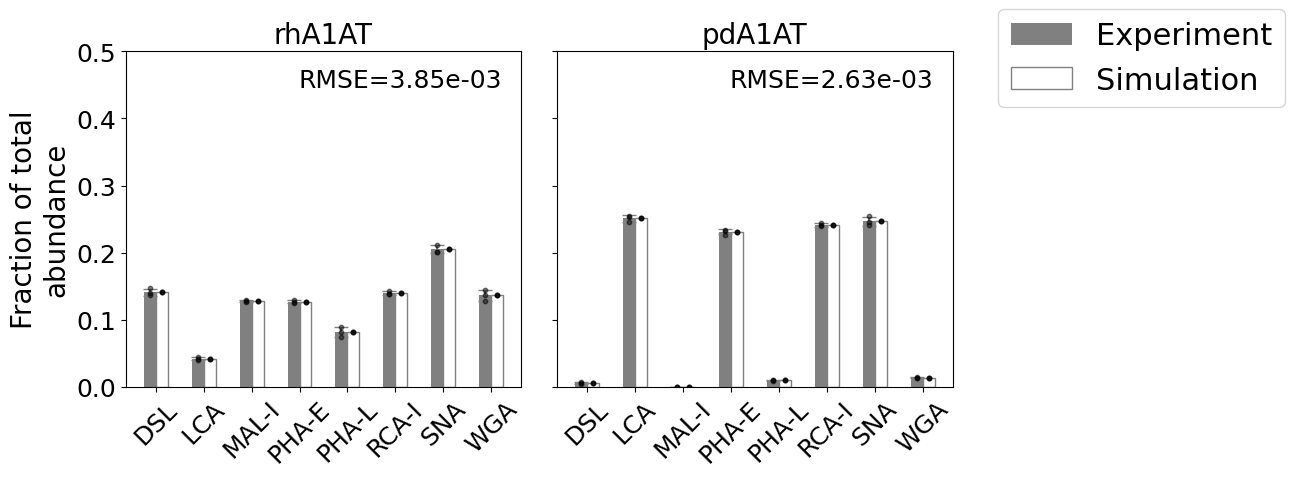

In [134]:
#Plot in Figure 2
myfun.plot_lp_formal(exp_FetIgG_lp,sim_FetIgG_lp,filename=YourFolder+'/Simulate_lp_barplot')

In [135]:
# file_path = '../Data/'+YourFolder+'/SourceData/Simulate_lp_barplot.xlsx'

# # Use ExcelWriter to save multiple DataFrames to different sheets
# with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
#     exp_FetIgG_lp.to_excel(writer, sheet_name='Experimental', index=False)
#     sim_FetIgG_lp.to_excel(writer, sheet_name='Simulate', index=False)

In [136]:
#Simulate lp for A1AT data. See how close are them.
sim_testing_lp_raw = myfun.simulate_lp(lm,bojar_rule_z95,testing_gp_expand,False)
sim_testing_lp_reg = myfun.fit_sim_lp_reg_rules(sim_testing_lp_raw, reg_rule)
sim_testing_lp_reg

,pdA1AT,rhA1AT-geCHO,rhA1AT-CHOS
DSL,0.030667,0.147124,1.776438
LCA,0.418794,0.341333,1.063988
MAL-I,0.000000,0.003755,0.527329
PHA-E,0.857506,0.853109,1.115294
PHA-L,0.051667,0.144853,1.390264
RCA-I,3.050199,1.544325,0.000000
SNA,2.953147,2.581481,1.467520
WGA,0.000000,0.000000,0.000000


In [137]:
testing_lp_mean = testing_lp.T.groupby(testing_lp.columns).mean()
testing_lp_mean = testing_lp_mean.T
testing_lp_mean

,FetB,pdA1AT,rhA1AT
DSL,1.6250,1.6455,0.3470
LCA,0.3130,0.1060,0.1435
MAL-I,2.1950,0.3360,0.0255
PHA-E,2.2485,0.2450,0.1220
PHA-L,2.2430,0.1915,0.0055
RCA-I,2.6030,2.3745,2.1955
SNA,2.5850,2.4880,2.4815
WGA,2.3740,0.0985,0.3525


In [138]:
#Curate the profiles.
# testing_lp.columns = ['BoIgG.1', 'BoIgG.2','rhA1AT.1', 'rhA1AT.2', 'pdA1AT.1', 'pdA1AT.2', 'FetB.1', 'FetB.2']
testing_lp.columns = ['rhA1AT.1', 'rhA1AT.2', 'pdA1AT.1', 'pdA1AT.2', 'FetB.1', 'FetB.2']
testing_lp

,rhA1AT.1,rhA1AT.2,pdA1AT.1,pdA1AT.2,FetB.1,FetB.2
DSL,0.341,0.353,1.693,1.598,1.582,1.668
LCA,0.141,0.146,0.101,0.111,0.295,0.331
MAL-I,0.026,0.025,0.318,0.354,2.190,2.200
PHA-E,0.130,0.114,0.239,0.251,2.181,2.316
PHA-L,0.005,0.006,0.203,0.180,2.293,2.193
RCA-I,2.198,2.193,2.402,2.347,2.651,2.555
SNA,2.514,2.449,2.531,2.445,2.610,2.560
WGA,0.367,0.338,0.106,0.091,2.319,2.429


In [139]:
# sim_testing_lp

In [140]:
sim_testing_lp = sim_testing_lp_reg.assign(FetB=sim_FetIgG_lp['FetB1'])
sim_testing_lp.drop('rhA1AT-CHOS',axis=1,inplace=True)
sim_testing_lp = sim_testing_lp[['rhA1AT-geCHO', 'pdA1AT', 'FetB']]#'BolgG', 
new_cols = [col for col in sim_testing_lp.columns for _ in range(2)]  # Repeats each column name twice
sim_testing_lp = sim_testing_lp.loc[:, new_cols]
sim_testing_lp.columns = testing_lp.columns
sim_testing_lp

,rhA1AT.1,rhA1AT.2,pdA1AT.1,pdA1AT.2,FetB.1,FetB.2
DSL,0.147124,0.147124,0.030667,0.030667,0.141095,0.141095
LCA,0.341333,0.341333,0.418794,0.418794,0.042110,0.042110
MAL-I,0.003755,0.003755,0.000000,0.000000,0.127771,0.127771
PHA-E,0.853109,0.853109,0.857506,0.857506,0.126701,0.126701
PHA-L,0.144853,0.144853,0.051667,0.051667,0.081589,0.081589
RCA-I,1.544325,1.544325,3.050199,3.050199,0.139697,0.139697
SNA,2.581481,2.581481,2.953147,2.953147,0.204877,0.204877
WGA,0.000000,0.000000,0.000000,0.000000,0.136160,0.136160


In [141]:
testing_gp_expand_final = testing_gp_expand.assign(FetB=FetB_IgG_gp_expand['FetB1'])
testing_gp_expand_final.drop('rhA1AT-CHOS',axis=1,inplace=True)
testing_gp_expand_final = testing_gp_expand_final[['rhA1AT-geCHO', 'pdA1AT', 'FetB']]#'BolgG',
new_cols = [col for col in testing_gp_expand_final.columns for _ in range(2)]
testing_gp_expand_final = testing_gp_expand_final.loc[:, new_cols]
testing_gp_expand_final.columns = testing_lp.columns
testing_gp_expand_final

,rhA1AT.1,rhA1AT.2,pdA1AT.1,pdA1AT.2,FetB.1,FetB.2
Ma6(Ma3)Mb4GNb4GN,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
Ma6(Ma2Ma3)Mb4GNb4GN,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
Ma6(GNb2Ma3)Mb4GNb4GN,0.023023,0.023023,0.000000,0.000000,0.0000,0.0000
Ma6(Ma3)Mb4GNb4(Fa6)GN,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
Ma6(Ab4GNb2Ma3)Mb4GNb4GN,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
GNb2Ma6(GNb2Ma3)Mb4GNb4GN,0.070070,0.070070,0.000000,0.000000,0.0000,0.0000
Ma6(Ma2Ma3)Mb4GNb4(Fa6)GN,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
Ma6(Ma3)Ma6(Ma3)Mb4GNb4GN,0.015015,0.015015,0.000000,0.000000,0.0246,0.0246
Ma6(GNb2Ma3)Mb4GNb4(Fa6)GN,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
Ma3Ma6(Ab4GNb2Ma3)Mb4GNb4GN,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000


In [142]:
#Normalize
NEWgp_testy = myfun.normalize(testing_gp_expand_final,0)
NEWlp_testx = myfun.normalize(testing_lp,0)
sim_NEWlp_testx = myfun.normalize(sim_testing_lp,0)

In [143]:
sim_NEWlp_testx

,rhA1AT.1,rhA1AT.2,pdA1AT.1,pdA1AT.2,FetB.1,FetB.2
DSL,0.026197,0.026197,0.004166,0.004166,0.141095,0.141095
LCA,0.060779,0.060779,0.056886,0.056886,0.042110,0.042110
MAL-I,0.000669,0.000669,0.000000,0.000000,0.127771,0.127771
PHA-E,0.151907,0.151907,0.116478,0.116478,0.126701,0.126701
PHA-L,0.025793,0.025793,0.007018,0.007018,0.081589,0.081589
RCA-I,0.274988,0.274988,0.414318,0.414318,0.139697,0.139697
SNA,0.459667,0.459667,0.401135,0.401135,0.204877,0.204877
WGA,0.000000,0.000000,0.000000,0.000000,0.136160,0.136160


In [144]:
NEWlp_testx
NEWlp_testx_noFetB = NEWlp_testx.loc[:, ~NEWlp_testx.columns.str.contains('FetB', case=False)]
sim_NEWlp_testx_noFetB = sim_NEWlp_testx.loc[:, ~sim_NEWlp_testx.columns.str.contains('FetB', case=False)]


In [145]:
#Save data for later model training and testing
FetB_IgG_gp_expand.to_excel('../Data/'+YourFolder+'/FetIgGgp_expand.xlsx',index = True)
BigData_gp_expand.to_excel('../Data/'+YourFolder+'/CHOgp_trainy.xlsx',index = True)
exp_FetIgG_lp.to_excel('../Data/'+YourFolder+'/FetIgGlp_exp.xlsx',index = True)
sim_FetIgG_lp.to_excel('../Data/'+YourFolder+'/FetIgGlp_sim.xlsx',index = True)
sim_BigData_lp.to_excel('../Data/'+YourFolder+'/sim_CHOlp_trainx.xlsx',index = True)


In [146]:

NEWgp_testy.to_excel('../Data/'+YourFolder+'/NEWgp_testy.xlsx',index = True)
NEWlp_testx.to_excel('../Data/'+YourFolder+'/NEWlp_testx.xlsx',index = True)
sim_NEWlp_testx.to_excel('../Data/'+YourFolder+'/sim_NEWlp_testx.xlsx',index = True)